In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pycabnn as cbn

from tqdm.autonotebook import tqdm, trange

In [3]:
from pycabnn.util import HocParameterParser

h = HocParameterParser()
config_hoc = str("../test_data/params/Parameters.hoc")
h.load_file(config_hoc)


In [4]:
mlipop = cbn.create_population("MLI", h)
mlipop.load_somata("../../big_test_data/MLIcoordinates.dat")
mlipop.add_dendrites()

Successfully read ../../big_test_data/MLIcoordinates.dat.


In [5]:
mlipop.dends.coo

array([[1479.23276055,  209.57129091,  334.39508576],
       [1479.21117216,  211.47421319,  335.01024488],
       [1479.18958378,  213.37713547,  335.625404  ],
       ...,
       [ 699.86398388,  318.46136235,  274.81954632],
       [ 699.83547676,  319.89143645,  273.42166384],
       [ 699.80696965,  321.32151054,  272.02378136]])

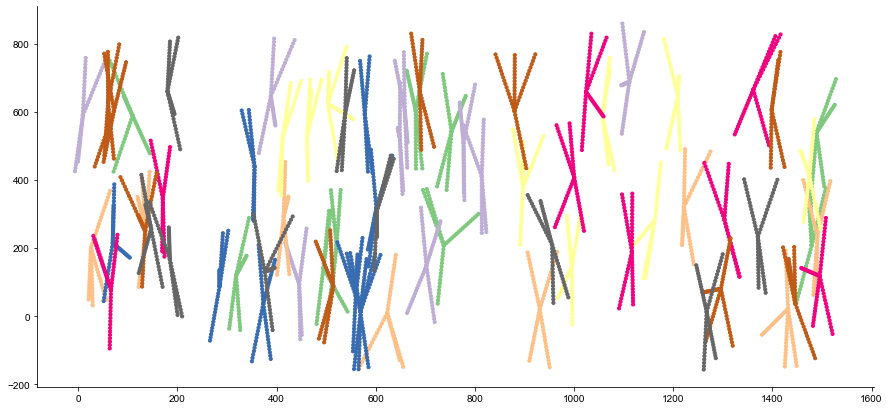

In [6]:
%matplotlib inline
ncell = 70
nidx = ncell*90*4

_, ax = plt.subplots(figsize=(15,7))
ax.scatter(mlipop.dends.coo[:nidx:5,0],mlipop.dends.coo[:nidx:5,1], 10, mlipop.dends.idx[:nidx:5], cmap='Accent')

In [73]:
from scipy.spatial import KDTree
from scipy.spatial.distance import pdist

cdist_gap = 8

fext = 2.5
dend_coo_rescaled = np.zeros(mlipop.dends.coo.shape)
dend_coo_rescaled[:,0] = fext*mlipop.dends.coo[:,0]
dend_coo_rescaled[:,1:] = mlipop.dends.coo[:,1:]

tree = KDTree(dend_coo_rescaled)
for _ in trange(1):
    d = tree.query_pairs(cdist_gap)

# prune self-connections
gap_cons = []
for pp in tqdm(d):
    src, tgt = pp
    
    src_cell = mlipop.dends.idx[src]
    tgt_cell = mlipop.dends.idx[tgt]
    
    if src_cell != tgt_cell:
        gap_cons.append({'source': src_cell, 'target': tgt_cell})

gap_cons = pd.DataFrame(gap_cons)

In [77]:
z1c = mlipop.som[gap_cons.source]
z2c = mlipop.som[gap_cons.target]

z1 = np.zeros((z1c.shape[0], 2))
z2 = np.zeros((z2c.shape[0], 2))

z1 = z1c[:,1:]
z2 = z2c[:,1:]

dist_yz = np.linalg.norm(z1 - z2, axis=-1)

z1 = np.zeros((z1c.shape[0], 1))
z2 = np.zeros((z2c.shape[0], 1))

z1 = z1c[:,0]
z2 = z2c[:,0]

dist_x = np.abs(z1 - z2)

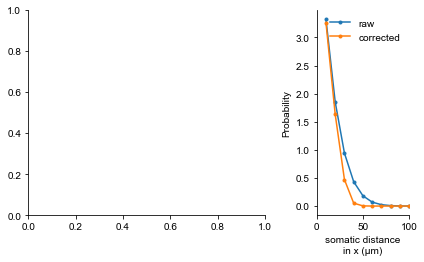

In [79]:
n, x = np.histogram(dist_yz, np.arange(0, 220, 20))
n = n/1e7
# n0, x0 = np.histogram(dist0, np.arange(201))

fig = plt.figure(figsize=(4*1.5,2.5*1.5))
gs = fig.add_gridspec(1, 3)
ax = fig.add_subplot(gs[0, 0:2])

# xc = (x[:-1]+x[1:])/2
# ax.plot(xc, n, '.-', label='raw')
# # ax.plot(xc, n*1/(1+np.exp((x[:-1]-30)/24)), '.-', label='corrected')
# ax.plot(xc, n*np.exp(-xc/48), '.-', label='corrected')
# # ax.plot(x0[:-1], n0)
# ax.set(
#     xlim=[0, 200],
#     xlabel='somatic distance\nin y-z (μm)',
#     ylabel='Probability'
# )
# # ax.legend()


n, x = np.histogram(dist_x, np.arange(5, 111, 10))
n = n/1e7

ax = fig.add_subplot(gs[0, 2])
xc = (x[:-1]+x[1:])/2
ax.plot(xc, n, '.-', label='raw')
ax.plot(xc, n*1/(1+np.exp((x[:-1]-25)/5)), '.-', label='corrected')
ax.set(
    xlim=[0, 100], 
    xlabel='somatic distance\nin x (μm)',
    ylabel='Probability'
)
ax.legend()

plt.tight_layout()
# plt.savefig('ngap_vs_dist.png', dpi=60)

In [26]:
cell_pair = np.array([(mlipop.dends.idx[pp[0]], 
                       mlipop.dends.idx[pp[1]]) 
                      for pp in pps])
cell_pair

NameError: name 'pps' is not defined

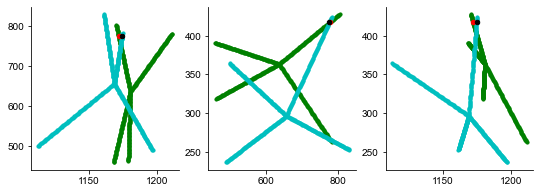

In [13]:
i = 32
c1 = pps[i][0]//360
c2 = pps[i][1]//360


def plot_gap_junc(i, x, y, ax):

    fdraw = ax.scatter
    fdraw(mlipop.dends.coo[(c1*360):((c1+1)*360),x],
                mlipop.dends.coo[(c1*360):((c1+1)*360),y], 10, 'g')
    fdraw(mlipop.dends.coo[(c2*360):((c2+1)*360),x],
                mlipop.dends.coo[(c2*360):((c2+1)*360),y], 10,'c')
    fdraw(mlipop.dends.coo[pps[i][0],x],
                mlipop.dends.coo[pps[i][0],y], 20, 'r')
    fdraw(mlipop.dends.coo[pps[i][1],x],
                mlipop.dends.coo[pps[i][1],y], 20, 'k')


_, axs = plt.subplots(ncols=3, figsize=(9,3))
plot_gap_junc(i, 0, 1, axs[0])
plot_gap_junc(i, 1, 2, axs[1])
plot_gap_junc(i, 0, 2, axs[2])


In [8]:
# from sklearn.neighbors import KDTree

# sktree = KDTree(mlipop.dends.coo)
# dsk = sktree.query_radius(mlipop.dends.coo, 2)


In [18]:
mlipop.dends.seg.shape
pp.shape

NameError: name 'pp' is not defined

In [44]:
cell_pair = np.array([(mlipop.dends.idx[pp[0]], 
                       mlipop.dends.idx[pp[1]]) 
                      for pp in d])
cell_pair

array([[ 2468,  2468],
       [ 2833, 10056],
       [10638, 10638],
       ...,
       [ 9631, 15885],
       [16226, 16226],
       [ 6708,  9365]])

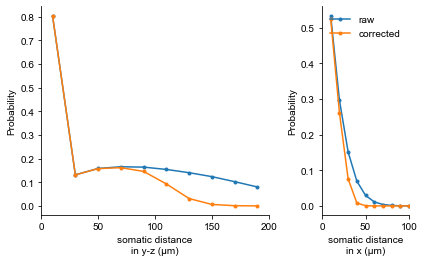

In [45]:
z1 = mlipop.som[cell_pair[:,0],:]
z2 = mlipop.som[cell_pair[:,1],:]
z1[:,0] = 0
z2[:,0] = 0

dist = np.linalg.norm(z1 - z2, axis=1)

n, x = np.histogram(dist, np.arange(0, 220, 20))
n = n/1e7
# n0, x0 = np.histogram(dist0, np.arange(201))

fig = plt.figure(figsize=(4*1.5,2.5*1.5))
gs = fig.add_gridspec(1, 3)
ax = fig.add_subplot(gs[0, 0:2])

xc = (x[:-1]+x[1:])/2
ax.plot(xc, n, '.-', label='raw')
ax.plot(xc, n*1/(1+np.exp((x[:-1]-105)/12)), '.-', label='corrected')
# ax.plot(x0[:-1], n0)
ax.set(
    xlim=[0, 200],
    xlabel='somatic distance\nin y-z (μm)',
    ylabel='Probability'
)
# ax.legend()

z1 = mlipop.som[cell_pair[:,0],:]
z2 = mlipop.som[cell_pair[:,1],:]
z1[:,1:] = 0
z2[:,1:] = 0

dist = np.linalg.norm(z1 - z2, axis=1)

n, x = np.histogram(dist,np.arange(5, 111, 10))
n = n/1e7

ax = fig.add_subplot(gs[0, 2])
xc = (x[:-1]+x[1:])/2
ax.plot(xc, n, '.-', label='raw')
ax.plot(xc, n*1/(1+np.exp((x[:-1]-25)/5)), '.-', label='corrected')
ax.set(
    xlim=[0, 100], 
    xlabel='somatic distance\nin x (μm)',
    ylabel='Probability'
)
ax.legend()

plt.tight_layout()
# plt.savefig('ngap_vs_dist.png', dpi=60)

## Synaptic

In [222]:
axont, id_axons = mlipop.gen_axon()

(-100.0, 300.0)

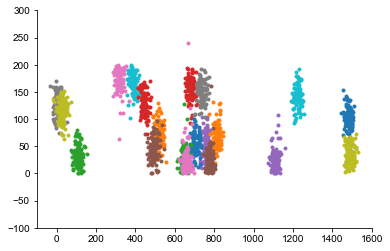

In [269]:
for i in range(20):
    plt.plot(axont1[i,:,0], axont1[i,:,2], '.')
    
plt.xlim([-100, 1600])
plt.ylim([-100, 300])

In [193]:
id_axons.shape
id_axons.shape

(19724, 100)

In [282]:
axont, id_axons = mlipop.gen_axon()

axont1 = axont.reshape(-1, 3)

ii = axont1[:,2]>mlipop.args.MLdepth
axont1[ii,2] = mlipop.args.MLdepth - np.random.gamma(2, scale=20/2.5, size=ii.sum())

ii = axont1[:,2]<0
axont1[ii,2] = 0 + np.random.gamma(2, scale=20/2.5, size=ii.sum())



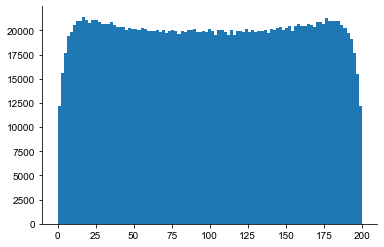

In [280]:
plt.hist(axont1.reshape(-1,3)[:,2], np.linspace(0, 200, 100));
# plt.xlim([0, 200])

In [306]:
axont, id_axons = mlipop.gen_axon()

In [285]:
axont.shape

(1972400, 3)

In [288]:
id_axons.shape

(1972400,)

(200.0, 450.0)

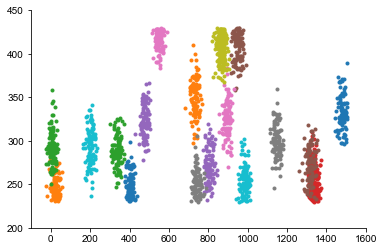

In [316]:
for i in range(0,2000,100):
    plt.plot(axont[id_axons==i,0], axont[id_axons==i,2], '.')
    
plt.xlim([-100, 1600])
plt.ylim([200, 450])

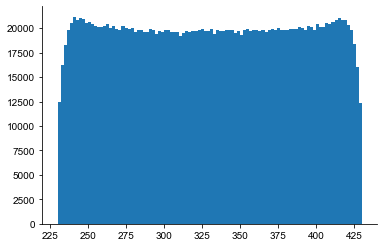

In [317]:
plt.hist(axont[:,2],100);

In [342]:
mlipop.add_dendrites()
plt.hist(mlipop.dends.coo[:,2],100);

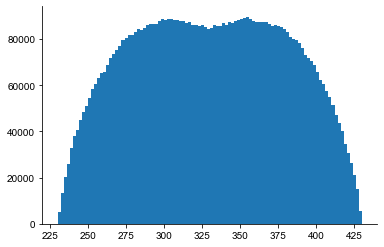

In [ ]:
from scipy.spatial import KDTree

cdist_gap = 3.3

tree = KDTree(mlipop.dends.coo)
d = tree.query_pairs(cdist_gap)

pps = [pp for pp in d if mlipop.dends.idx[pp[0]]!=mlipop.dends.idx[pp[1]]]

In [354]:
print(mlipop.dends.coo.shape,'\n',mlipop.axons.coo.shape)

(7100640, 3) 
 (1972400, 3)


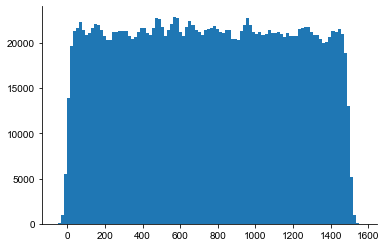

In [353]:
plt.hist(mlipop.axons.coo[:,0],100);

In [355]:
from scipy.spatial import KDTree
import pandas as pd

dend_tree = KDTree(mlipop.dends.coo)
axon_tree = KDTree(mlipop.axons.coo)


In [371]:
cdist_syn = 1.5

z = dend_tree.query_ball_tree(axon_tree, cdist_syn)

In [387]:
zt = pd.DataFrame([{'source': k, 'target': i} for i, x in enumerate(z) if len(x)!=0 for k in x])

In [388]:
zt

,source,target
0,1761045,23
1,124451,32
2,489156,33
3,1653322,40
4,1653322,41
...,...,...
819627,99374,7100593
819628,861138,7100595
819629,1523254,7100596
819630,1918342,7100600
